## Clasificación de cobertura del suelo a partir de imágenes Sentinel-2 y con un modelo de Deep Learning pre-entrenado


## Carga de librerías necesarias

In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.learn import classify_pixels
from arcgis.raster.functions import equal_to
from arcgis.raster.functions import extract_band


import pandas as pd
from datetime import datetime as dt
from ipywidgets import HBox, VBox, Label, Layout

Conexión a la organización de ArcGIS Online

In [2]:
from arcgis.gis import GIS
gis = GIS("home")

You are logged on as liber.preventas with an administrator role, proceed with caution.


### Acceso a la capa de datos alojada

<Item title:"Pirineos_05_01_2023" type:Imagery Layer owner:liber.preventas>
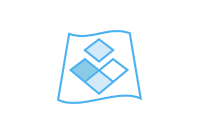

In [3]:
imagery = gis.content.get("e798a7289419489481856e0c362e4625")
imagery

### Acceso al modelo del Living Atlas

<Item title:"Land Cover Classification (Sentinel-2)" type:Deep Learning Package owner:esri_analytics>
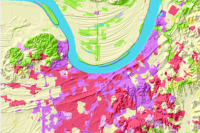

In [4]:
model = gis.content.get("afd124844ba84da69c2c533d4af10a58")
model

### Previsualización de la capa en mapa

In [7]:
map1 = gis.map()

In [8]:
map1.add_layer(imagery)
map1

MapView(layout=Layout(height='400px', width='100%'))

#### Obtenemos la extensión del mapa sobre la que se aplicará el modelo
Podemos hacer zoom sobre el widget de mapa para definir mejor sobre qué parte de la imagen se ejecutará la clasificación de píxeles

In [9]:
ext = map1.extent
ext

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': 92163.25988270156,
 'ymin': 5226056.078771058,
 'xmax': 195506.1221241206,
 'ymax': 5256630.890085087}

### Clasificación de píxeles
Se ejecuta la [clasificación de píxeles](https://developers.arcgis.com/python/api-reference/arcgis.learn.toc.html#classify_pixels) sobre la **capa** en cuestión pasándole el modelo como parámetro. 


In [10]:
classified_pirineo = classify_pixels(
    input_raster=imagery.layers[0],
    model=model,
    model_arguments={
        "padding": 56,
        "batch_size": 64,
        "predict_background": True,
        "tile_size": 224,
        "test_time_augmentation": True,
        "merge_classes": True,
        "sentinel_imagery_level": 1,
    },
    output_name="classified_output_2016" + str(dt.now().microsecond),
    context={"extent": ext, "processorType": "GPU", "cellSize": 10},
    tiles_only=False,
)

> Ha tardado unos 18 min en ejecutarse en un ArcGIS Notebook Advanced con GPU

In [11]:
classified_pirineo

<Item title:"classified_output_2016350506" type:Imagery Layer owner:liber.preventas>

### Visualización del resultado

In [12]:
map4 = gis.map()
map4.add_layer(classified_pirineo)

In [13]:
map4

MapView(layout=Layout(height='400px', width='100%'))